## 0. 더미 코드

### 0. 라이브러리 import

In [233]:
# test for upload

In [234]:
# !pip install tensorflow
# !pip install sklearn


In [235]:
# import tensorflow as tf
# print(tf.__version__) # .__version__ 속성으로 버전을 확인함

# import pandas as pd
# import numpy as np

# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense

# import random
# import matplotlib.pyplot as plt

### 1. 간단한 딥러닝 모델 만들기

#### 1. Sequential API

In [236]:
# # 모델 학습에 사용할 입력 데이터를 준비함.
# # y=x+1 관계를 갖는 숫자를 x,y 변수에 각각 10개씩 입력함.
# # 이 때, x변수의 숫자 배열을 (10행 1열) 형태의 2차원 배열로 변환함.
# x=[-3,31,-11,4,0,22,-2,-5,-25,-14]
# y=[-2,32,-10,5,1,23,-1,-4,-24,-13]

# X_train=np.array(x).reshape(-1,1)
# y_train=np.array(y)

# print(X_train.shape,y_train.shape)

* * *
케라스 Sequential API는 레이어 여러 개를 연결하여 신경망 모델을 구성하는 도구이다.  
  
간단한 아키텍처를 가지면서도 대부분의 딥러닝 모델을 만들 수 있다는 장점이 있다.
* * *

In [237]:
# model=Sequential() # Sequential 모델 인스턴스를 생성함


# # add 메소드를 사용하여 완전 연결 레이어(Dense)를 모델에 추가함.

# # 입력 데이터의 차원(input_dim)은 모델 학습에 사용하는 설명 변수(피처)의 개수를 지정하는데,
# # 여기서는 1개의 피처를 사용하므로 1로 설정함.

# # 완전 연결 레이어의 출력값은 목표 레이블(Y)을 예측함
# # 한 개의 연속성 수치(ex.주택 가격)를 예측하는 회귀 문제이므로 유닛(unit) 개수는 1임
# # 활성화(activation) 함수로 'linear' 옵션을 지정하여 선형 함수의 출력을 그대로 사용함.
# model.add(Dense(units=1,activation='linear',input_dim=1))

In [238]:
# # summary 메소드를 이용하여 모델 아키텍처(구조)를 확인함
# # 딥러닝 모델이 학습할 모수(파라미터:Param #)는 2개인데,
# # 일차함수의 기울기(회귀계수)와 절편(상수항)임.
# model.summary()

#### 2. 모델 컴파일

In [239]:
# # 모델이 훈련하는데 필요한 기본 설정을 compile 함수에 지정하는데,
# # 옵티마이저(optimizer)와 손실 함수(loss)를 설정함.

# # adam 옵티마이저를 선택하고 회귀 분석의 손실 함수인 평균제곱오차(mse)를 지정함.

# # metrics 옵션에 보조 평가 지표를 추가할 수 있는데,
# # 여기서는 평균절대오차(mae)를 추가하여 손실 함수를 모니터링할 때 함께 추적하기로 함.
# model.compile(optimizer='adam',loss='mse',metrics=['mae'])

#### 3. 모델 학습 및 예측

In [240]:
# # fit 메소드에 훈련 데이터를 입력하여 모델을 학습시키는데,
# # 컴파일 단계에서 설정한 adam 옵티마이저와 mse 손실 함수를 가지고 최적의 가중치와 편향을 찾음.

# # 에포크(epoch)는 전체 입력 데이터를 모두 몇 번 학습할 것인지 반복 횟수를 정함.

# # verbose 옵션을 False(0)로 지정하면 훈련 과정을 화면에 보여주지 않는데,
# # 훈련 과정을 표시하려면 1 또는 2를 입력함.
# model.fit(X_train,y_train,epochs=3000,verbose=0)

In [241]:
# # 학습을 마친 딥러닝 모델의 가중치를 확인하려면 weights 속성을 보면 됨
# # 기울기에 해당하는 가중치(kernel:0)와 절편에 해당하는 편향(bias:0) 모두 1에 가까운 값을 가지는데,
# # 이는 모델 학습을 통해 일차함수 관계식을 매우 근사하게 찾아낸 것으로 볼 수 있다.
# model.weights

In [242]:
# # 테스트 데이터(X)를 predict 메소드에 입력하면 목표 레이블(Y)에 대한 예측값을 얻을 수 있음.
# model.predict([[11],[12],[13]])

### 2. 딥러닝을 활용한 회귀 분석 : 보스턴 주택 가격 예측

#### 0. 랜덤 시드 고정

In [243]:
# # 랜덤 시드 고정
# SEED=12
# random.seed(SEED)
# np.random.seed(SEED)
# tf.random.set_seed(SEED)
# print('시드 고정:',SEED)

#### 1. 데이터 전처리

In [244]:
# # sklearn 데이터셋에서 보스턴 주택 데이터셋 로딩
# from sklearn import datasets
# housing=datasets.load_boston()
# X_data=housing.data
# y_data=housing.target

In [245]:
# print(X_data.shape,y_data.shape)

* * *
입력 데이터의 서로 다른 피처 값의 범위를 비슷한 크기로 맞춰 주면 딥러닝 모델의 성능을 확보하는데 유리한데,  
  
이것을 피처 스케일링이라고 부름.
* * *

In [246]:
# # MinMaxScaler를 사용하여 입력 데이터(X_data)의 모든 피처 값을 0~1 범위로 정규화 처리함.
# # 피처 스케일링
# from sklearn.preprocessing import MinMaxScaler

# scaler=MinMaxScaler()
# X_data_scaled=scaler.fit_transform(X_data)

# X_data_scaled[0]

In [247]:
# # 모델 학습에 사용하기 위하여 훈련 데이터(80%)와 검증 데이터(20%)를 분할함.
# # 학습 - 테스트 데이터셋 분할
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.2,shuffle=True,random_state=SEED)
# print(X_train.shape,y_train.shape)
# print(X_test.shape,y_test.shape)

#### 2. MLP 모델 아키텍처 정의

* * *
완전 연결(Dense) 레이어만 사용하여 5개 레이어를 갖는 다층 신경망(MLP)을 만든다.  
  
레이어를 추가할 때는 add 함수를 사용한다.  
  
은닉 레이어 4개는 각각 128개, 64개, 32개, 16개의 유닛을 갖는다.  
  
입력 데이터의 피처가 13개이므로 첫 번째 Dense 레이어의 input_dim에 13을 지정한다.  
* * *

In [248]:
# # 심층 신경망
# def build_model(num_input=1):
#     model=Sequential()
#     model.add(Dense(128,activation='relu',input_dim=num_input))
#     model.add(Dense(64,activation='relu'))
#     model.add(Dense(32,activation='relu'))
#     model.add(Dense(16,activation='relu'))
#     model.add(Dense(1,activation='relu'))

#     model.compile(optimizer='adam',loss='mse',metrics=['mae'])

#     return model

# model=build_model(num_input=13)
# model.summary()

#### 3. 미니 배치 학습

* * *
모델을 훈련시킬 때 샘플 데이터를 한 개씩 입력해서 가중치를 갱신하려면 학습 시간이 오래 걸리는 문제가 있음.  
  
***미니 배치 학습***은 전체 데이터를 여러 개의 작은 배치 단위로 나누고 배치에 들어 있는 샘플 데이터를 묶어서 모델에 입력함.  
  
배치 단위로 경사하강법을 적용하고 손실 함수를 최소화하는 방향으로 가중치를 업데이트함.
* * *

In [249]:
# # 모델 훈련
# model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=2)

* * *
evaluate 함수에 테스트 데이터를 입력하여 모델의 일반화 성능을 평가함  
  
loss는 11.93이고 mae는 2.57임  
  
검증 손실이 훈련 손실보다 크기 때문에 과대적합으로 판단됨  
  
배치 크기에 따라 모델 성능이 달라질 수 있기 때문에 모델을 설계할 때 중요하게 고려해야 함.  
* * *

In [250]:
# model.evaluate(X_test,y_test)

#### 4. 교차 검증

* * *
학습 데이터 일부(여기서는 25%)를 검증 데이터를 사용하여 교차 검증을 해봄  
  
fit 메소드의 validation_split 옵션에 테스트 데이터셋 비율을 입력하면 됨  
  
마지막 200번째 에포크 학습이 끝났을 때 훈련 손실이 검증 손실보다 작은 값이므로 과대적합 상태로 판단됨.  
* * *

In [251]:
# model=build_model(num_input=13)
# history=model.fit(X_train,y_train,batch_size=32,epochs=200,validation_split=0.25,verbose=2)

* * *
훈련 손실(loss)과 검증 손실(val_loss)을 그래프로 나타냄  
  
가로축에는 에포크(epoch)를 놓고 세로축에 손실 함수 값을 표시함  
  
모델 10에포크까지 매우 빠른 속도로 학습이 되고, 이후 점차 완만하게 학습 속도가 낮아지며  
그래프가 평평해지는 추이를 보임.  
* * *

In [252]:
# def plot_loss_curve(total_epoch=10,start=1):
#     plt.figure(figsize=(5,5))
#     plt.plot(range(start,total_epoch+1),
#             history.history['loss'][start-1:total_epoch],
#             label='Train')
#     plt.plot(range(start,total_epoch+1),
#             history.history['val_loss'][start-1:total_epoch],
#             label='Validation')
#     plt.xlabel('Epochs')
#     plt.ylabel('mse')
#     plt.legend()
#     plt.show()

# plot_loss_curve(total_epoch=200,start=1)

* * *
20에포크 이후의 손실 함수를 그림  
  
앞의 그래프에서는 훈련 손실과 검증 손실 간에 차이가 드러나지 않았지만,
다음의 그래프를 보면 40에포크 이후 과대적합이 커지는 것을 볼 수 있다.
* * *

In [253]:
# plot_loss_curve(total_epoch=200,start=20)

### 3. 딥러닝을 활용한 분류 예측 : 와인 품질 등급 판별

#### 0. 시드 설정

In [254]:
# # 랜덤 시드 고정
# SEED=12
# random.seed(SEED)
# np.random.seed(SEED)
# tf.random.set_seed(SEED)
# print("시드 고정:",SEED)

#### 1. 데이터 전처리

In [255]:
# train=pd.read_csv('./output/data/wine/train.csv')
# test=pd.read_csv('./output/data/wine/test.csv')
# submission=pd.read_csv('./output/data/wine/sample_submission.csv')

# print(train.shape,test.shape,submission.shape)

In [256]:
# # train 데이터의 내용을 살펴봄, 목표 변수는 와인 품질을 나타내는 quality 열임.
# train.head()

In [257]:
# # 제출 파일의 양식을 보면 와인 품질을 나타내는 quality 열에 예측값을 입력해야 함.
# submission.head()

In [258]:
# # type 열의 데이터를 살펴봄, 화이트 와인(white)이 4159개, 레드와인(red)이 1338개
# train['type'].value_counts()

* * *
type 열의 범주형 데이터는 문자열 값을 가짐  
  
모델 학습에 입력하려면 숫자형 데이터로 변환해야 함  
  
화이트 와인을 나타내는 'white' 문자열을 숫자 1로 바꾸고,  
레드 와인을 나타내는 'red' 문자열을 숫자 0으로 변환함.  
* * *

In [259]:
# train['type']=np.where(train['type']=='white',1,0).astype(int)
# test['type']=np.where(test['type']=='white',1,0).astype(int)
# train['type'].value_counts()

In [260]:
# # 이번에는 목표 변수인 quality 열의 데이터 개수를 확인함, 6등급 와인의 개수가 가장 많음.

# train['quality'].value_counts()

* * *
목표 변수는 연속형 숫자 데이터가 아니라, 와인 등급을 나타내는 범주형 데이터임  
  
케라스 to_categorical 함수를 이용하여 목표 변수를 원핫 인코딩 변환함.  
  
원핫 인코딩을 하기 전에 숫자 3을 차감하여 와인 등급을 0~6 범위로 바꿈  
  
와인 등급은 3~9까지 모두 7개 클래스로 구분되는데, 3~9 범위 값으로 원핫 인코딩을 하면  
숫자 0부터 최대값인 9까지 10개 클래스로 인식하기 때문임.  
* * *

In [261]:
# from tensorflow.keras.utils import to_categorical

# y_train=to_categorical(train.loc[:,'quality']-3)
# y_train

* * *
모델 학습에 사용할 피처를 선택하고, MinMax 스케일링으로 모든 피처 변수의 데이터를 0~1 범위로  
정규화 변환함.  
  
이때 훈련 데이터(X_train)로 정규화 학습을 하고, 같은 조건을 검증 데이터(X_test)에 적용하여 변환하는 점에 유의함.
* * *

In [262]:
# # 피처 선택
# X_train=train.loc[:,'fixed acidity':]
# X_test=test.loc[:,'fixed acidity':]

# # 피처 스케일링
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# scaler.fit(X_train)
# scaler.fit(X_train)
# X_train_scaled=scaler.fit_transform(X_train)
# X_test_scaled=scaler.fit_transform(X_test)

# print(X_train_scaled.shape,y_train.shape)
# print(X_test_scaled.shape)

#### 2. 모델 설계 : 드랍아웃 활용

* * *
완전 연결 레이어(Dense) 4개 층으로 구성되는 신경망 모델을 구성함  
  
모델의 과대적합을 방지하기 위하여 드랍아웃(Dropout) 레이어를 추가함  
  
드랍아웃은 입력 레이어왕 은닉 레이어 간의 연결 중 일부를 랜덤으로 제거한 상태에서 학습하는 기법임  
  
결과적으로 유닛 사이에 연결된 가중치 수를 줄이는 효과를 얻기 때문에 과대적합을 방지 가능.  
  
  
미니 배치 단위로 학습할 때마다 연결 네트워크에서 제거되는 가중치가 달라짐,  
때문에 매번 다른 네트워크 구조를 갖는 모델을 얻게 됨  
  
즉, 앙상블 효과가 있어 모델 성능이 개선됨  
  
  
Dense 레이어 뒤에 Dropout 레이어를 추가하고, dropout rate를 설정함  
  
0.2로 설정하면 20% 확률로 랜덤하게 연결을 제거하게 됨  
  
은닉 레이어의 활성화 함수로 tanh를 사용해 봄  
  
다중 분류 모델이므로 마지막 출력 레이어의 활성화 함수는 softmax를 적용함  
  
옵티마이저는 RMSProp, 손실 함수는 categorical_crossentropy를 지정함  
  
metrics 옵션에 여러 개의 보조 평가 지표를 입력할 수 있음  
  
여기서는 acc(정확도)와 mae(평균절대값오차)를 지정함.
* * *

In [263]:
# # 심층 신경망 모델
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense,Dropout

# def build_model(train_data,train_target):
#     model=Sequential()
#     model.add(Dense(128,activation='tanh',input_dim=train_data.shape[1]))
#     model.add(Dropout(0.2))
#     model.add(Dense(64,activation='tanh'))
#     model.add(Dropout(0.2))
#     model.add(Dense(32,activation='tanh'))
#     model.add(Dense(train_target.shape[1],activation='softmax'))

#     model.compile(optimizer='RMSProp',loss='categorical_crossentropy',metrics=['acc','mae'])

#     return model

# model=build_model(X_train_scaled,y_train)
# model.summary()

# # tanh 함수는 -1~+1 사이의 출력 범위를 가짐
# # 입력값이 0 근처일 때는 학습율이 좋지만,
# # 입력값이 커지거나 작아지는 경우 기울기(가중치)가 0에 가까워지므로
# # 학습이 이루어지지 않는 문제가 생김.

# # 따라서 ReLU 함수에 비해 사용빈도가 낮음 편임.

#### 3. 콜백 함수 : Early Stopping 기법

* * *
콜백(callback) 함수를 사용하면 모델 학습 과정을 세밀하게 컨트롤할 수 있음.  
  
가장 많이 사용되는 방법 중에 Early Stopping이 있음.  
  
딥러닝 모델 학습에서 에포크 수를 늘려 학습을 계속 반복하면 훈련 데이터에 대한 오차(손실 함수)  
를 계속 낮출 수 있음.  
  
하지만 과대적합을 일으켜 테스트 데이터를 포함한 새로운 데이터에 대한 예측력이 나빠지는 문제가 발생함.  
  
이때 Early Stopping을 사용하면 과대적합이 발생하기 직전에 학습을 멈출 수 있음.  
  
홀드아웃으로 검증 데이터를 분할하고, 검증 데이터에 대한 모델 성능이 일정 에포크 동안 좋아지지 않으면  
모델 학습을 중단함.  
  
이때 허용되는 에포크 수를 patience 옵션에 설정함.  
  
다음의 예제는 200에포크로 설정되어 있지만, 학습 중 10에포크 동안 연속하여  
검증 데이터에 대한 손실 함수(val_loss)가 줄어들지 않으면 학습을 멈춤.
* * *

In [264]:
# # Early Stopping 기법
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.callbacks import EarlyStopping

# X_tr,X_val,y_tr,y_val=train_test_split(X_train_scaled,y_train,test_size=0.15,shuffle=True,random_state=SEED)

# early_stopping=EarlyStopping(monitor='val_loss',patience=10)
# history=model.fit(X_tr,y_tr,batch_size=64,epochs=200,validation_data=(X_val,y_val),callbacks=[early_stopping],verbose=2)

* * *
Early Stopping으로 학습을 멈추면 모델은 학습이 중지된 상태의 가중치로 고정됨  
  
검증 데이터에 대한 모델 성능을 evaluate 함수로 평가하면 앞의 실행 결과에서 54에포크가 종료된 상태에서의  
  
평가 지표 값(val_loss,val_acc,val_mae)과 동일하다는 것을 알 수 있음  
* * *

In [265]:
# model.evaluate(X_val,y_val)

#### 4. 예측값 정리 및 파일 제출

* * *
테스트 데이터를 predict 함수에 입력하면 목표 변수의 각 클래스에 대한 확률값을 반환함  
  
다중 분류 문제로 마지막 레이어의 활성화 함수를 softmax로 사용했기 때문.
* * *

In [266]:
# # test 데이터에 대한 예측값 정리
# y_pred_proba=model.predict(X_test)
# y_pred_proba[:5]

* * *
앞에서 출력한 첫 번째 원소를 보면 7개 클래스에 대한 예측 확률값이 순서대로 표시되어 있음  
  
4번째 원소(클래스 3)의 확률값이 가장 높으며,  
넘파이 argmax 함수를 사용하면 가장 값이 큰 원소의 인덱스 값을 얻을 수 있음.  
  
따라서 7개 확률값 중에서 가장 큰 원소가 있는 인덱스 3을 출력함.  
  
  
하지만 모델이 예측한 값을 그대로 제출하면 안 됨  
  
데이터 전처리를 할 때 목표 변수의 값에서 3을 차감했기 때문  
  
모델 예측값에 3을 더하면 목표 레이블 값을 복원할 수 있음  
  
따라서 첫 번째 테스트 샘플에 대한 예측값은 6이 됨.
* * *

In [267]:
# y_pred_label=np.argmax(y_pred_proba,axis=-1)+3
# y_pred_label[:5]

In [268]:
# # 제출 양식에 맞게 정리
# submission['quality']=y_pred_label.astype(int)
# submission.head()

In [269]:
# # 제출 파일 저장
# submission.to_csv('output/data/wine/wine_dnn_002.csv',index=False)

In [270]:
# df=rdf[:]
# print('Number of rows and columns:', df.shape)

In [271]:
# fact = pd.factorize(df['region'])
# df['region'] = fact[0]
# df

In [272]:
# df.drop(['lightning','condition','datetime','HI','DI'], axis=1, inplace=True)
# df

In [273]:
# df.dropna(inplace=True)
# df

In [274]:
# df['test']=str(df['year'])+'-'+str(df['month'])+'-'+str(df['day'])
# df

In [275]:
# df['date'] = pd.to_datetime((df['year']*10000 + df['month']*100 + df['day']).astype(str), format='%Y%m%d')

In [276]:
# df.drop(['year','month','day'],axis=1,inplace=True)
# df

In [277]:
# df=df[['date','temp','rainfall','humidity','wind_speed','wind_direction','region','hour']]
# df

#### Onehot Encoding

In [278]:
# # Onehot Encoding
# df['hour']=df['hour'].astype('category')
# df=pd.get_dummies(df,columns=['hour'],prefix='H',drop_first=True)
# df

In [279]:
# pd.set_option('display.max_columns', None)
# df.head()

In [280]:
# df_27=df[df['region']==27]
# df_27=df_27.reset_index(drop=True)
# df_27.head()

In [281]:
# df_10=df[df['region']==10]
# df_10=df_10.reset_index(drop=True)
# df_10.head()

In [282]:
# df_10_01=df_10[pd.DatetimeIndex(df_10['date']).year<=2019]
# df_10_01

In [283]:
# # Feature Scaling
# X_train_scaled=X_train.loc[:,'temp':]
# X_test_scaled=X_test.loc[:,'temp':]

# scaler=MinMaxScaler()
# scaler.fit(X_train_scaled.values)
# X_train_scaled.loc[:,:]=scaler.transform(X_train_scaled.values)
# X_test_scaled.loc[:,:]=scaler.transform(X_test_scaled.values)

In [284]:
# for batch in test_data.take(1):
#     inputs,targets=batch

# print("Input:",inputs.numpy().shape)
# print("Target:",targets.numpy().shape)

In [285]:
# inputs[0]

In [286]:
# targets[0]

In [287]:
# df=rdf[:]
# fact = pd.factorize(df['region'])
# df['region'] = fact[0]
# df

In [288]:
# df_8m=df[(df['month']==8)]
# df_8m_10r=df_8m[df_8m['region']==10]

# df_7m=df[(df['month']==7)]
# df_7m_10r=df_7m[df_7m['region']==10]

# df_6m=df[(df['month']==6)]
# df_6m_10r=df_6m[df_6m['region']==10]

In [289]:
# xs_8m=df_8m_10r['datetime'].to_list() 
# xs_7m=df_7m_10r['datetime'].to_list()
# xs_6m=df_6m_10r['datetime'].to_list()

# ys_8m=df_8m_10r['temp'].to_list()
# ys_7m=df_7m_10r['temp'].to_list()
# ys_6m=df_6m_10r['temp'].to_list()

# plt.figure(figsize=(100, 8))

# plt.plot(xs_8m, ys_8m, 'o-', ms=3, lw=1, label='8th month')
# plt.plot(xs_7m, ys_7m, 'o-', ms=3, lw=1, label='7th month')
# plt.plot(xs_6m, ys_6m, 'o-', ms=3, lw=1, label='6th month')
# plt.ylim(0,40)
# plt.xlabel('Date')
# plt.ylabel('Temp')
# plt.legend()

## Ⅰ. 모델링

#### 0. 라이브러리 및 데이터 import

In [290]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from keras.layers import Input
from keras.callbacks import EarlyStopping


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing import timeseries_dataset_from_array
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Input, LSTM, Dense

In [291]:
rdf=pd.read_csv('output/daegu_final.csv')

#### 데이터 전처리

In [315]:
df=rdf[:]
print('Number of rows and columns:', df.shape)

fact = pd.factorize(df['region'])
df['region'] = fact[0]

df.drop(['lightning','condition','datetime','HI','DI'], axis=1, inplace=True)

df.dropna(inplace=True)

df['date'] = pd.to_datetime((df['year']*10000 + df['month']*100 + df['day']).astype(str), format='%Y%m%d')


# df.drop(['year','month','day'],axis=1,inplace=True)

df=df[['date','month','temp','rainfall','humidity','wind_speed','wind_direction','region','hour']]
# df=df[['date','temp','rainfall','humidity','wind_speed','wind_direction','region','hour']]
df

Number of rows and columns: (14831616, 15)


,date,month,temp,rainfall,humidity,wind_speed,wind_direction,region,hour
4519,2010-12-06,12,11.6,0.0,32.0,4.1,304.0,0,7
4520,2010-12-06,12,10.6,0.0,35.0,3.6,300.0,0,8
4521,2010-12-06,12,9.2,0.0,27.0,3.8,295.0,0,9
4522,2010-12-06,12,7.9,0.0,34.0,4.1,281.0,0,10
4523,2010-12-06,12,5.7,0.0,44.0,3.6,298.0,0,11
...,...,...,...,...,...,...,...,...,...
14831611,2022-04-30,4,10.7,0.0,71.0,2.1,335.0,141,19
14831612,2022-04-30,4,11.0,0.0,65.0,2.2,339.0,141,20
14831613,2022-04-30,4,11.9,0.0,61.0,2.2,338.0,141,21
14831614,2022-04-30,4,13.4,0.0,53.0,2.0,351.0,141,22


In [316]:
# df_all=df[(df['month']==12)|(df['month']==1)|(df['month']==2)|(df['month']==6)|(df['month']==7)|(df['month']==8)]
df_all=df[(df['month']==6)|(df['month']==7)|(df['month']==8)|(df['month']==9)]
df_all

,date,month,temp,rainfall,humidity,wind_speed,wind_direction,region,hour
8760,2011-06-01,6,19.0,0.0,77.0,1.6,86.0,0,0
8761,2011-06-01,6,19.8,0.0,66.0,1.3,48.0,0,1
8762,2011-06-01,6,20.4,0.0,66.0,2.1,270.0,0,2
8763,2011-06-01,6,21.9,0.0,60.0,1.6,101.0,0,3
8764,2011-06-01,6,21.8,0.0,61.0,2.2,270.0,0,4
...,...,...,...,...,...,...,...,...,...
14826523,2021-09-30,9,16.8,0.0,100.0,0.5,338.0,141,19
14826524,2021-09-30,9,17.1,0.0,100.0,1.0,328.0,141,20
14826525,2021-09-30,9,16.9,0.0,100.0,2.0,346.0,141,21
14826526,2021-09-30,9,17.5,0.0,100.0,2.2,325.0,141,22


In [332]:
# df_all_10r=df_all[(df_all['region']==10)]
# df_all_10r

In [317]:
# df_all_10r_ind=df_all_10r.reset_index(drop=True)
df_all_ind=df_all.reset_index(drop=True)

In [296]:
# plt.figure(figsize=(30, 6))
# df_all_10r.plot(y=['temp'])

In [318]:
df_all_ind.drop(['month'],axis=1,inplace=True)
df_all_ind

,date,temp,rainfall,humidity,wind_speed,wind_direction,region,hour
0,2011-06-01,19.0,0.0,77.0,1.6,86.0,0,0
1,2011-06-01,19.8,0.0,66.0,1.3,48.0,0,1
2,2011-06-01,20.4,0.0,66.0,2.1,270.0,0,2
3,2011-06-01,21.9,0.0,60.0,1.6,101.0,0,3
4,2011-06-01,21.8,0.0,61.0,2.2,270.0,0,4
...,...,...,...,...,...,...,...,...
4573531,2021-09-30,16.8,0.0,100.0,0.5,338.0,141,19
4573532,2021-09-30,17.1,0.0,100.0,1.0,328.0,141,20
4573533,2021-09-30,16.9,0.0,100.0,2.0,346.0,141,21
4573534,2021-09-30,17.5,0.0,100.0,2.2,325.0,141,22


#### train과 test로 데이터 분리

In [338]:
# Setting
train_split_idx=3000000
window_size=100                       # 과거 100시간 동안 시계열 데이터를 학습 데이터로 사용
future=24                             # 24시간 이후의 타깃 예측

# Features
X_train=df_all_ind.iloc[:train_split_idx-window_size-future,0:]

# Targets
y_train=df_all_ind.iloc[window_size+future:train_split_idx,[1]]  # 'temp' 열

print(X_train.shape,y_train.shape)

(2999876, 8) (2999876, 1)


In [339]:
df_all_ind.iloc[[train_split_idx-1,train_split_idx,train_split_idx+1]]

,date,temp,rainfall,humidity,wind_speed,wind_direction,region,hour
2999999,2012-08-11,27.4,0.0,78.0,0.0,0.0,93,23
3000000,2012-08-12,28.5,0.0,73.0,0.8,50.0,93,0
3000001,2012-08-12,28.5,0.0,71.0,0.5,79.0,93,1


In [340]:
# X_test
test_start=train_split_idx-window_size-future   # 테스트 데이터 시작 행
test_end=df_all_ind.shape[0]-window_size-future
X_test=df_all_ind.iloc[test_start:test_end,0:]

# y_test
# label_start= +future        # 테스트 데이터의 첫 번째 타깃 데이터 위치
y_test=df_all_ind.iloc[train_split_idx:,[1]]    # 'temp' 열 선택

print(X_test.shape,y_test.shape)

(1573536, 8) (1573536, 1)


#### 입력 데이터 0~1로 조정

In [341]:
# Feature Scaling
X_train_scaled=X_train.loc[:,'temp':]
X_test_scaled=X_test.loc[:,'temp':]

scaler=MinMaxScaler()
scaler.fit(X_train_scaled.values)
X_train_scaled.loc[:,:]=scaler.transform(X_train_scaled.values)
X_test_scaled.loc[:,:]=scaler.transform(X_test_scaled.values)

#### 배치 사이즈 조정

In [302]:
# # Mini Batch 크기로 시계열 변환
# train_data=timeseries_dataset_from_array(X_train_scaled,y_train,sequence_length=window_size,batch_size=16)
# test_data=timeseries_dataset_from_array(X_test_scaled,y_test,sequence_length=window_size,batch_size=16)

# print(train_data)
# print(test_data)

In [303]:
# # Mini Batch 크기로 시계열 변환
# train_data=timeseries_dataset_from_array(X_train_scaled,y_train,sequence_length=window_size,batch_size=32)
# test_data=timeseries_dataset_from_array(X_test_scaled,y_test,sequence_length=window_size,batch_size=32)

# print(train_data)
# print(test_data)

<BatchDataset element_spec=(TensorSpec(shape=(None, None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>


In [304]:
# # Mini Batch 크기로 시계열 변환
# train_data=timeseries_dataset_from_array(X_train_scaled,y_train,sequence_length=window_size,batch_size=64)
# test_data=timeseries_dataset_from_array(X_test_scaled,y_test,sequence_length=window_size,batch_size=64)

# print(train_data)
# print(test_data)

In [342]:
# Mini Batch 크기로 시계열 변환
train_data=timeseries_dataset_from_array(X_train_scaled,y_train,sequence_length=window_size,batch_size=1024)
test_data=timeseries_dataset_from_array(X_test_scaled,y_test,sequence_length=window_size,batch_size=1024)

print(train_data)
print(test_data)

<BatchDataset element_spec=(TensorSpec(shape=(None, None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>


#### (배치사이즈, 타임스텝, 컬럼수-1)

In [343]:
for batch in test_data.take(1):
    inputs,targets=batch

print("Input:",inputs.numpy().shape)
print("Target:",targets.numpy().shape)

Input: (1024, 100, 7)
Target: (1024, 1)


In [344]:
inputs[0]

<tf.Tensor: shape=(100, 7), dtype=float64, numpy=
array([[0.51829268, 0.        , 0.75555556, 0.08284024, 0.31024931,
        1.        , 0.86956522],
       [0.53963415, 0.        , 0.73333333, 0.07692308, 0.41274238,
        1.        , 0.91304348],
       [0.55487805, 0.        , 0.76666667, 0.09467456, 0.39058172,
        1.        , 0.95652174],
       [0.58231707, 0.        , 0.7       , 0.13017751, 0.34626039,
        1.        , 1.        ],
       [0.59146341, 0.        , 0.66666667, 0.18343195, 0.35734072,
        1.        , 0.        ],
       [0.66768293, 0.        , 0.55555556, 0.21301775, 0.31578947,
        1.        , 0.04347826],
       [0.71341463, 0.        , 0.48888889, 0.26627219, 0.24099723,
        1.        , 0.08695652],
       [0.72256098, 0.        , 0.46666667, 0.31360947, 0.33240997,
        1.        , 0.13043478],
       [0.72560976, 0.        , 0.45555556, 0.31952663, 0.32686981,
        1.        , 0.17391304],
       [0.7347561 , 0.        , 0.4333333

In [345]:
targets[0]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([28.5])>

#### 3층 레이어

In [348]:
model=Sequential()
model.add(Input(shape=[100,7]))

model.add(LSTM(units=32,return_sequences=False))
model.add(Dense(units=16,activation='linear'))
model.add(Dense(units=1,activation='linear'))

model.compile(optimizer='adam',loss='mae',metrics=['mse'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 32)                5120      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 5,665
Trainable params: 5,665
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
2930/2930 [==============================] - 1159s 395ms/step - loss: 2.7006 - mse: 17.6015 - val_loss: 2.3561 - val_mse: 8.5763
Epoch 2/10
2930/2930 [==============================] - 1176s 401ms/step - loss: 1.8551 - mse: 5.9857 - val_loss: 2.3366 - val_mse: 8.3805
Epoch 3/10
2930/2930 [==============================] - 2197s 750ms/step - loss: 1.8104 - mse: 5.7596 - val_loss: 2.2733 - val_mse: 8.0060
Epoch 4/10
2930/2930 [==============================] - 1180s 403ms/step - loss: 1.7977 - mse: 5.6833 - val_loss: 2.1771 - val_mse: 7.4599
Epoch 5/10
2930/2930 [==============================] - 1195s 408ms/step - loss: 1.7708 - mse: 5.5380 - val_loss: 2.0901 - val_mse: 6.8820
Epoch 6/10
2930/2930 [==============================] - 1179s 402ms/step - loss: 1.7070 - mse: 5.2033 - val_loss: 2.1203 - val_mse: 7.1167
Epoch 7/10
2930/2930 [==============================] - 1100s 375ms/step - loss: 1.6623 - mse: 4.9708 - val_loss: 1.9667 - val_mse: 6.3165
Epoch 8/10
2930/2930 [====

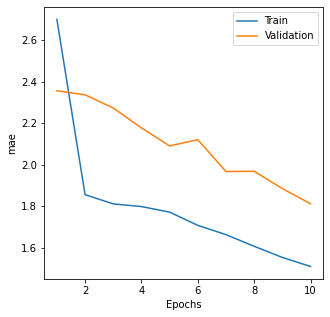

In [349]:
# 모델 훈련
history=model.fit(train_data,epochs=10,validation_data=test_data,verbose=1)

# 손실 함수 그래프
def plot_loss_curve(history,total_epoch=10,start=1):
    plt.figure(figsize=(5,5))
    plt.plot(range(start,total_epoch+1),
        history.history['loss'][start-1:total_epoch],
        label='Train')
    plt.plot(range(start,total_epoch+1),
        history.history['val_loss'][start-1:total_epoch],
        label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('mae')
    plt.legend()
    plt.show()

plot_loss_curve(history=history,total_epoch=len(history.history['loss']),start=1)

In [313]:
model=Sequential()
model.add(Input(shape=[100,7]))

model.add(LSTM(units=32,return_sequences=False))
model.add(Dense(units=16,activation='linear'))
model.add(Dense(units=1,activation='linear'))

model.compile(optimizer='adam',loss='mae',metrics=['mse'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 32)                5120      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5,665
Trainable params: 5,665
Non-trainable params: 0
_________________________________________________________________


In [314]:
# 모델 훈련
history=model.fit(train_data,epochs=50,validation_data=test_data,verbose=1)

# 손실 함수 그래프
def plot_loss_curve(history,total_epoch=10,start=1):
    plt.figure(figsize=(5,5))
    plt.plot(range(start,total_epoch+1),
        history.history['loss'][start-1:total_epoch],
        label='Train')
    plt.plot(range(start,total_epoch+1),
        history.history['val_loss'][start-1:total_epoch],
        label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('mae')
    plt.legend()
    plt.show()

plot_loss_curve(history=history,total_epoch=len(history.history['loss']),start=1)

Epoch 1/50
307/307 [==============================] - 13s 37ms/step - loss: 7.3356 - mse: 118.0800 - val_loss: 4.9518 - val_mse: 37.8102
Epoch 2/50
307/307 [==============================] - 13s 42ms/step - loss: 3.4135 - mse: 17.8974 - val_loss: 4.9171 - val_mse: 37.2785
Epoch 3/50
307/307 [==============================] - 13s 41ms/step - loss: 3.4175 - mse: 17.9397 - val_loss: 4.9210 - val_mse: 37.2534
Epoch 4/50
307/307 [==============================] - 13s 41ms/step - loss: 3.3944 - mse: 17.7069 - val_loss: 4.8984 - val_mse: 36.8205
Epoch 5/50
307/307 [==============================] - 13s 43ms/step - loss: 3.3584 - mse: 17.3606 - val_loss: 4.9347 - val_mse: 36.9598
Epoch 6/50
307/307 [==============================] - 13s 41ms/step - loss: 3.2445 - mse: 16.2742 - val_loss: 4.7432 - val_mse: 34.0572
Epoch 7/50
307/307 [==============================] - 13s 41ms/step - loss: 2.9853 - mse: 13.7900 - val_loss: 4.3985 - val_mse: 29.2849
Epoch 8/50
307/307 [===========================

KeyboardInterrupt: 

#### 2층 레이어

In [ ]:
model=Sequential()
model.add(Input(shape=[100,7]))

model.add(LSTM(units=32,return_sequences=False))
model.add(Dense(units=1,activation='linear'))

model.compile(optimizer='adam',loss='mae',metrics=['mse'])

model.summary()

In [ ]:
# 모델 훈련
history=model.fit(train_data,epochs=10,validation_data=test_data,verbose=1)

# 손실 함수 그래프
def plot_loss_curve(history,total_epoch=10,start=1):
    plt.figure(figsize=(5,5))
    plt.plot(range(start,total_epoch+1),
        history.history['loss'][start-1:total_epoch],
        label='Train')
    plt.plot(range(start,total_epoch+1),
        history.history['val_loss'][start-1:total_epoch],
        label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('mae')
    plt.legend()
    plt.show()

plot_loss_curve(history=history,total_epoch=len(history.history['loss']),start=1)

#### 4층 레이어

In [ ]:
model=Sequential()
model.add(Input(shape=[100,7]))

model.add(LSTM(units=32,return_sequences=False))
model.add(Dense(units=16,activation='linear'))
model.add(Dense(units=8,activation='linear'))
model.add(Dense(units=1,activation='linear'))

model.compile(optimizer='adam',loss='mae',metrics=['mse'])

model.summary()

In [ ]:
# 모델 훈련
history=model.fit(train_data,epochs=10,validation_data=test_data,verbose=1)

# 손실 함수 그래프
def plot_loss_curve(history,total_epoch=10,start=1):
    plt.figure(figsize=(5,5))
    plt.plot(range(start,total_epoch+1),
        history.history['loss'][start-1:total_epoch],
        label='Train')
    plt.plot(range(start,total_epoch+1),
        history.history['val_loss'][start-1:total_epoch],
        label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('mae')
    plt.legend()
    plt.show()

plot_loss_curve(history=history,total_epoch=len(history.history['loss']),start=1)

In [ ]:
# 모델 훈련
history=model.fit(train_data,epochs=50,validation_data=test_data,verbose=1)

# 손실 함수 그래프
def plot_loss_curve(history,total_epoch=10,start=1):
    plt.figure(figsize=(5,5))
    plt.plot(range(start,total_epoch+1),
        history.history['loss'][start-1:total_epoch],
        label='Train')
    plt.plot(range(start,total_epoch+1),
        history.history['val_loss'][start-1:total_epoch],
        label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('mae')
    plt.legend()
    plt.show()

plot_loss_curve(history=history,total_epoch=len(history.history['loss']),start=1)

#### 5층 레이어

In [ ]:
model=Sequential()
model.add(Input(shape=[100,7]))

model.add(LSTM(units=64,return_sequences=False))
model.add(Dense(units=32,activation='linear'))
model.add(Dense(units=16,activation='linear'))
model.add(Dense(units=8,activation='linear'))
model.add(Dense(units=1,activation='linear'))

model.compile(optimizer='adam',loss='mae',metrics=['mse'])

model.summary()

In [ ]:
# 모델 훈련
history=model.fit(train_data,epochs=10,validation_data=test_data,verbose=1)

# 손실 함수 그래프
def plot_loss_curve(history,total_epoch=10,start=1):
    plt.figure(figsize=(5,5))
    plt.plot(range(start,total_epoch+1),
        history.history['loss'][start-1:total_epoch],
        label='Train')
    plt.plot(range(start,total_epoch+1),
        history.history['val_loss'][start-1:total_epoch],
        label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('mae')
    plt.legend()
    plt.show()

plot_loss_curve(history=history,total_epoch=len(history.history['loss']),start=1)

In [ ]:
# 모델 훈련
history=model.fit(train_data,epochs=50,validation_data=test_data,verbose=1)

# 손실 함수 그래프
def plot_loss_curve(history,total_epoch=10,start=1):
    plt.figure(figsize=(5,5))
    plt.plot(range(start,total_epoch+1),
        history.history['loss'][start-1:total_epoch],
        label='Train')
    plt.plot(range(start,total_epoch+1),
        history.history['val_loss'][start-1:total_epoch],
        label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('mae')
    plt.legend()
    plt.show()

plot_loss_curve(history=history,total_epoch=len(history.history['loss']),start=1)